<a href="https://colab.research.google.com/github/OruneAminul/AI_class_Fall21/blob/main/6_6_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [11]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [12]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [5]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(6, 7, activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2,strides=2))
model.add(layers.Conv2D(16, 5, activation='relu'))
model.add(layers.AveragePooling2D(2,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='sigmoid'))
model.add(layers.Dense(84, activation='sigmoid'))
model.add(layers.Dense(84, activation='sigmoid'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 6)         300       
_________________________________________________________________
average_pooling2d_4 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_9 (Dense)              (None, 84)               

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt)
model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
227/227 [==============================] - 3s 10ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 2/100
227/227 [==============================] - 2s 9ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 3/100
227/227 [==============================] - 2s 9ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 4/100
227/227 [==============================] - 2s 9ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 5/100
227/227 [==============================] - 2s 9ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 6/100
227/227 [==============================] - 2s 8ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_accuracy: 0.0980
Epoch 7/100
227/227 [==============================] - 2s 8ms/step - loss: 12.2357 - accuracy: 0.0973 - val_loss: 12.3087 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


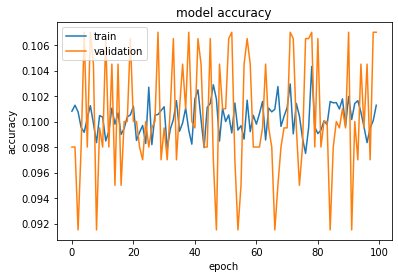

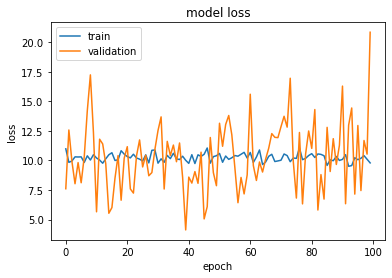

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()